# 6.1: Least Squares & the Normal Equations

Suppose we want to solve $A \vec x = \vec b$ where $A$ is $m \times n$, $m>n$ (more equations than unknowns $\implies$ **overdetermined system**). This is what the system would look like:

$$
\begin{aligned}
    A &= \left[\begin{array}{cccc}a_{11} & a_{12} & \cdots & a_{1n}\\a_{21} & a_{22} & & \\\cdots\\a_{m1} & & & a_{mn}\end{array}\right]\\
    \vec x &= [x_1 \:\:x_2\:\:\cdots\:x_n]^T\\
    \vec b &= [b_1\:\:b_2\:\:\cdots\:\:b_n]^T
\end{aligned}
$$

Assume that the columns of $A$ are linearly independent (so $A$ has full column rank, $\text{rank}(A) = n$). Usually, we can't find a solution $\vec x$ that works exactly, so we hope to minimize $||\vec r|| = ||\vec b - A \vec x||$. As such, we are actually solving $\min_{\vec x}||\vec b - A \vec x||$. For convenience, we square the norm (which in turns cleans the square root) and multiply by $\frac{1}{2}$ (gets rid of some constants later). This means that we want to find the absolute minimum of the function $\Psi(x_1, x_2, ..., x_n) = \Psi(\vec x) = \frac{1}{2}||\vec b - A \vec x||^2$. This means that we need to find $\frac{\partial}{\partial x_n} \vec x = 0$ for each component. Let's do some simplifying (NOTE: Calc III content coming in!!!!)

$$
\begin{aligned}
    b
\end{aligned}
$$

## Least-Squares Algorithm

1. Form $B = A^TA$ and $\vec y = A^T\vec b$ (takes $m \cdot n^2$ flops)
2. Find the Colesky Factor $G$ (lower triangular) such that $B = GG^T$ (takes $\frac{1}{3}n^3 + O(n^2)$ flops)
3. Solve the system $G \vec z = \vec y$ for $\vec z$ (takes $O(n^2)$ flops)
4. Solve $G^T \vec x = \vec z$ for $\vec x$ where $\vec x$ is the solution that minimizes $\min_{\vec x}||\vec b - A \vec x||$ (takes $O(n^2$ flops)

You could also compute $\vec x = B^{-1} \vec y = (A^TA)^{-1}(A^T\vec b)$ where $(A^TA)^{-1}$ is the pseudo inverse of $A$.

## Least Squares & Data Fitting

> **Hooke's Law:** the force $F$ needed to stretch a spring of length $\ell$ to a distance $t$ is:
> $$F(t) = k(t-\ell)$$
> where $k$ is the spring constant (it is always positive and is a material property of the spring)

Let's say that we go into the lab to figure out the $k$ of a mystery sping. For a spring of $\ell = 0.1$ meters, we apply forces of $F_i = \{1,1.5,2,2.5,\cdots,10\}$ Newtons and we measure the resulting stretched distances $t_i$. Let's try simulating this in MATLAB:

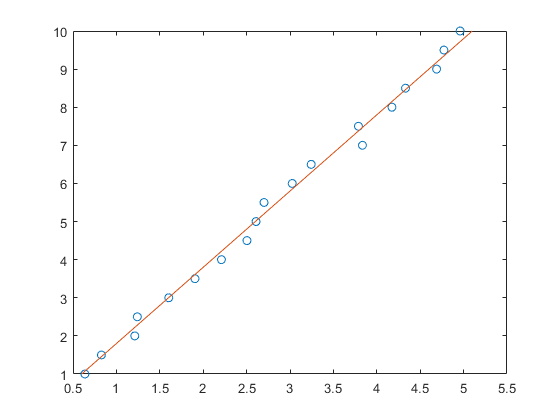

In [4]:
% NOTE: This code will correspond with code for HW8

F = 1:0.5:10; % measured forces
l = 0.1; % length of spring
k = 2; % spring constant (unknown)

noise = 0.1 * randn(size(F));

t = (F + k*l)/k + noise;

plot(t,F,'o', (F + k*l)/k,F)

**IN GENERAL:** Suppose that we have a set of noisy data $\{(t_i, b_i)\}_{i=1}^m$ and we suspect the data can be modeled by a function $v(t)$. We then want to minimize the sum of the squares of the errors of the data points from the best fit line. The area of the $i^{th}$ square is $e_i^2 = |b_i - v(t_i)|^2$ and the sum of all the squares is $\sum_{i=1}^m |b_i - v(t_i)|^2$. 

Let $\vec b = [b_1\:\:b_2\:\:\cdots\:\:b_m]^T$. Then $\vec v(t) = [x_1+x_2t_1\:\:x_1+x_2t_2\:\:\cdots\:\:x_1+x_2t_m]^T$. Then we get that:

![A](A.png)

## What if the Noise is NOT Linear?

For a general polynomial $v(t) = x_1 + x_2t + x_3t^2 + \cdots + x_nt^{n-1}$, then the Vandermonde Matrix $A$ is the first column being 1s, the second column being the $t_m$'s, the third column is the $t_m^2$'s, etc. etc. until the final column is $t_m^{n-1}$'s. This means that the resulting $\vec x$ vector has $n$ entries, but the rest of the stuff still applies.

This is still called a Linear Least Squares algorithm because this still uses linear algebra to solve this.